# INSURANCE COST PREDICTIONS ANALYSIS

In [3]:
# importing the packages--
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [4]:
# reading the data file--
def read_data():
    data=pd.read_csv("C:/ANKITA/ASSIGNMENTS/Day 23 - 21st May/Assignments/Regression/insurance.csv ")
    return data

In [5]:
# calling the function--
data= read_data()
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [6]:
# data analysis--
data.shape

(1338, 7)

In [7]:
# printing basic info about data--
print(data.columns)
print("==========================")
print(data.dtypes)
print("==========================")
print(data.info())

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [8]:
# insights of data--
print('1.minimum age of primary beneficiary is',data["age"].min())
print('2.Maximun age of primary beneficiary is',data["age"].max())
print('3.Maximun Number of dependents are',data["children"].max())
print("4.Ideal BMI ranges between 18.5 to 24.9, No of beneficiaries whose BMI is ideal are",
      len(data[data["bmi"].between(18.5,24.9)]))
print("5.Percentages of beneficiaries having BMI above 24.9 are",(len(data[data["bmi"]>24.9])/1338)*100)
print('6.Average medical cost billed by health insurance is around',data["charges"].mean())
print("7.The beneficiary's residential area in the US are",data["region"].unique())

1.minimum age of primary beneficiary is 18
2.Maximun age of primary beneficiary is 64
3.Maximun Number of dependents are 5
4.Ideal BMI ranges between 18.5 to 24.9, No of beneficiaries whose BMI is ideal are 222
5.Percentages of beneficiaries having BMI above 24.9 are 81.91330343796712
6.Average medical cost billed by health insurance is around 13270.422265141257
7.The beneficiary's residential area in the US are ['southwest' 'southeast' 'northwest' 'northeast']


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


<Axes: >

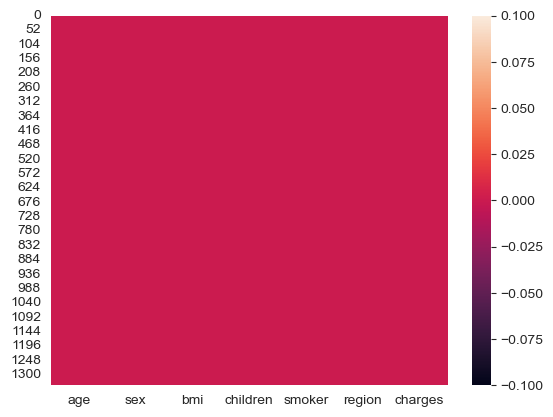

In [9]:
# checking the missing values --
print(data.isnull().sum())
sns.heatmap(data.isnull())

In [10]:
###  Inference - There are no missing values.

# Exploratory Data Analysis

<Axes: >

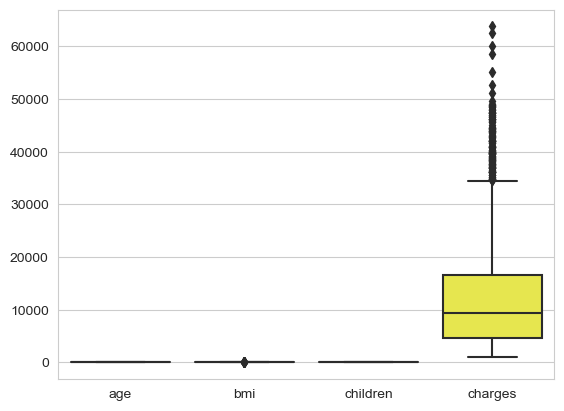

In [11]:
# checking the outliers--
sns.boxplot(data=data.loc[:, ['age', 'bmi', 'children', 'charges']],palette="hot")

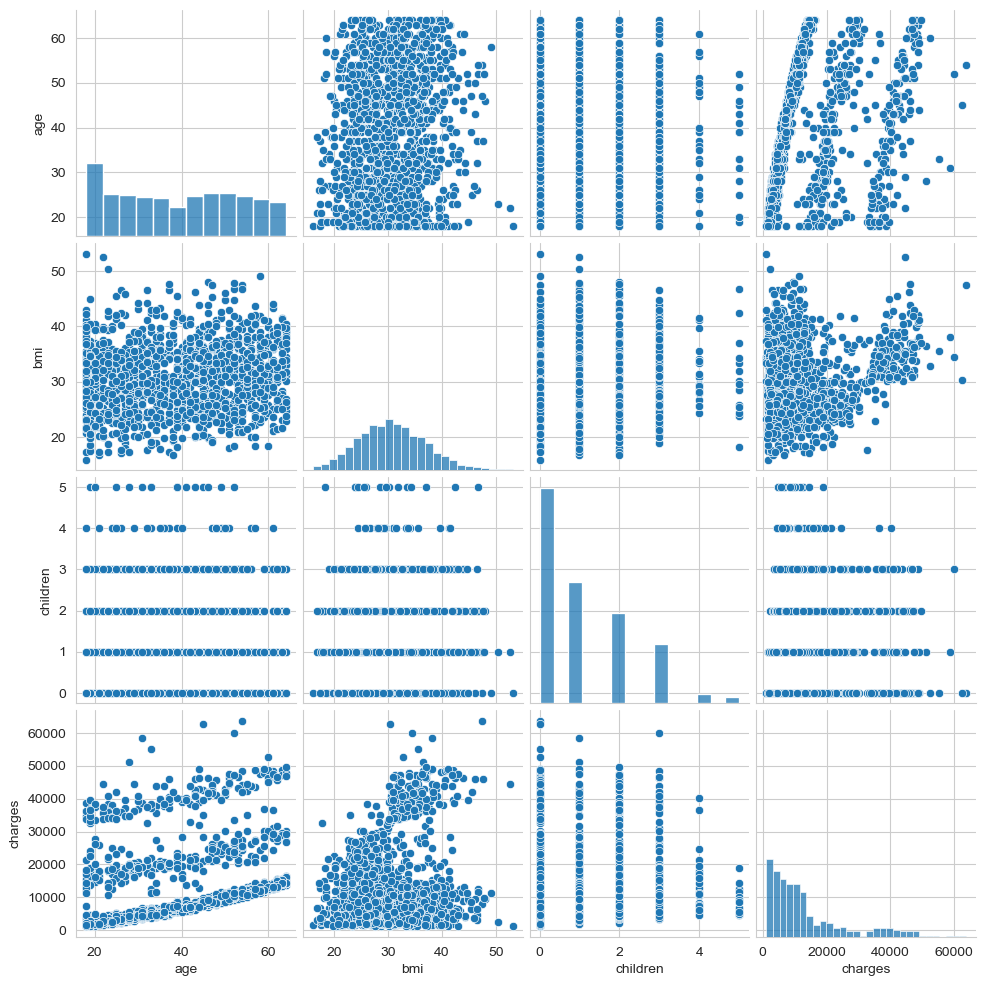

In [12]:
sns.pairplot(data)

In [13]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

1.5158796580240388


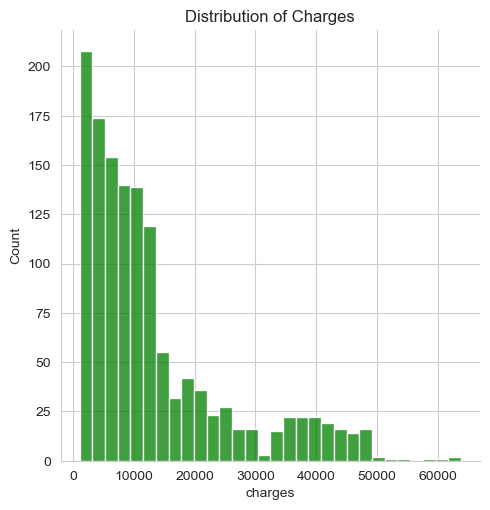

In [14]:
sns.displot(x=data["charges"],color="g")
plt.title("Distribution of Charges")
print(data["charges"].skew())

<Axes: ylabel='charges'>

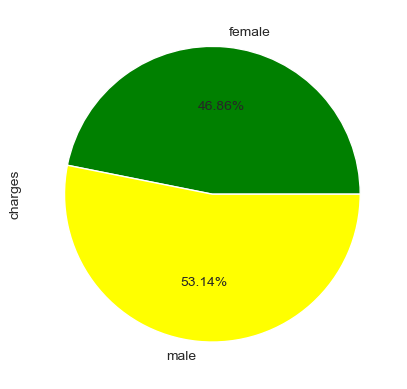

In [15]:
data.groupby(['sex'])['charges'].sum().plot(kind = 'pie',colors = ['green','yellow'],autopct = "%.2f%%")

In [16]:
### Pieplot represent the average percentage of charges for the male and female.

<Axes: ylabel='charges'>

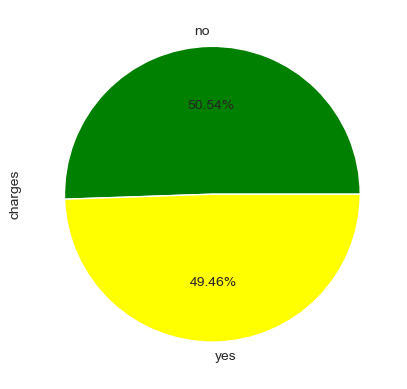

In [17]:
data.groupby(['smoker'])['charges'].sum().plot(kind = 'pie',colors = ['green','yellow'],autopct = "%.2f%%")

In [18]:
### Pieplot represent the average percentage of charges for the smokers and non-smokers.

smoker
no     1064
yes     274
Name: sex, dtype: int64


Text(0.5, 1.0, 'Percentages of Smokers')

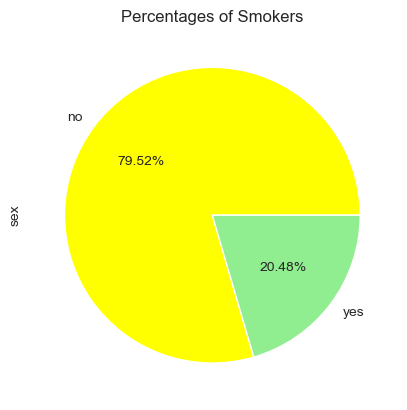

In [19]:
data.groupby(["smoker"])["sex"].count().plot(kind="pie",colors=["yellow","lightgreen"],autopct='%.2f%%')
print(data.groupby(["smoker"])["sex"].count())
plt.title("Percentages of Smokers")

In [20]:
### Pieplot represent the average percentage of sex (males & females) for the smokers.

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
dtype: int64


Text(0.5, 1.0, 'Sex v/s Smokers')

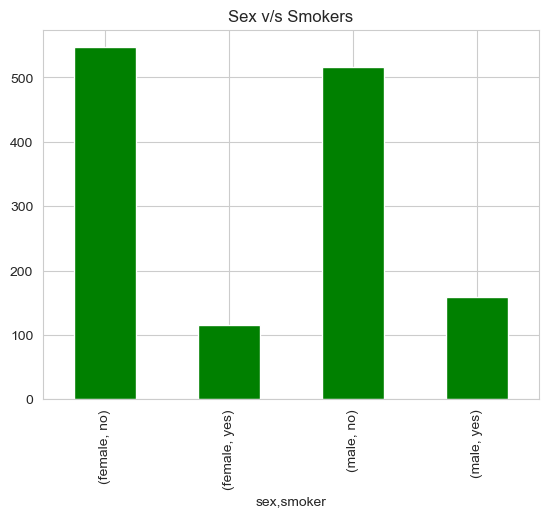

In [21]:
print(data.groupby(["sex","smoker"]).size())
data.groupby(["sex","smoker"]).size().plot(kind="bar",color="g")
plt.title("Sex v/s Smokers")

Text(0.5, 1.0, 'Age v/s Charges')

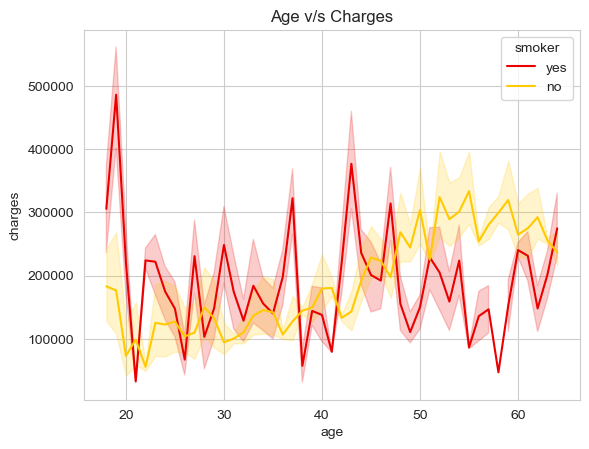

In [22]:
sns.lineplot(x="age",y="charges",data=data,hue="smoker",estimator="sum",palette='hot')
plt.title("Age v/s Charges")

Text(0.5, 1.0, 'Age v/s Charges')

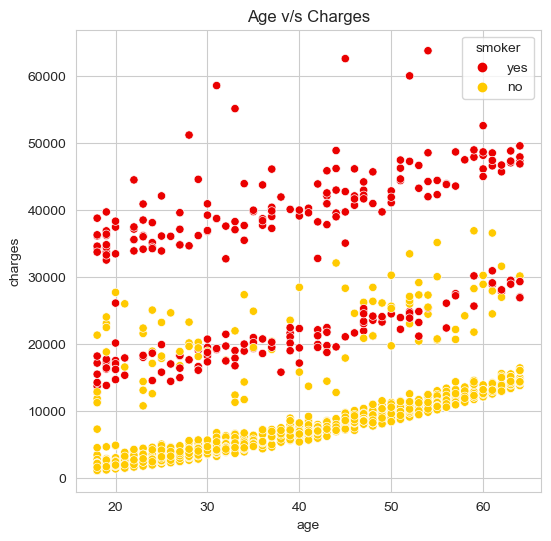

In [23]:
plt.figure(figsize=(6,6))
sns.scatterplot(x="age",y="charges",data=data,hue="smoker",palette="hot")
plt.title("Age v/s Charges")

<Axes: xlabel='children', ylabel='charges'>

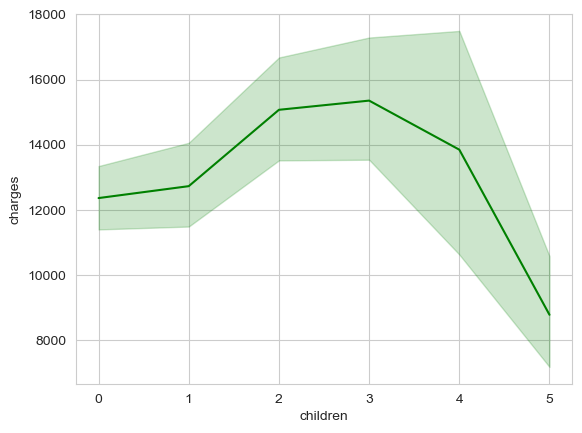

In [24]:
sns.lineplot(x="children",y="charges",data=data,color="g")

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


Text(0.5, 1.0, 'Residential area of beneficiaries')

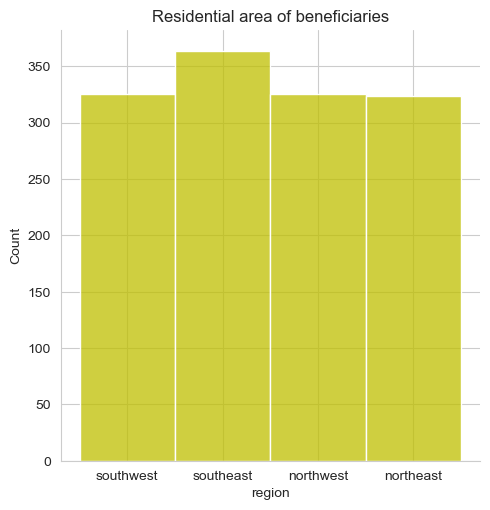

In [25]:
print(data["region"].value_counts())
sns.displot(x=data["region"],color="y")
plt.title("Residential area of beneficiaries")

Skewness-- 0.2840471105987448
Mean BMI-- 30.66339686098655


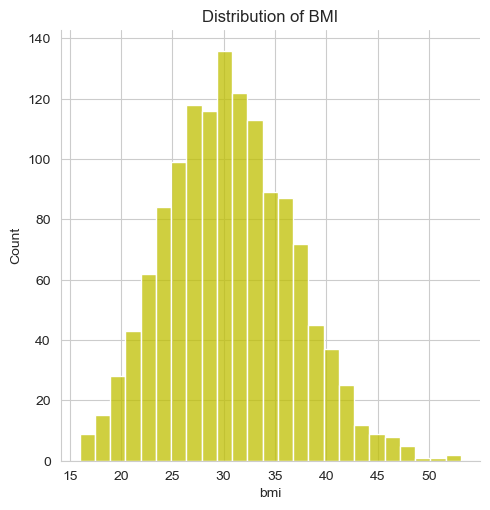

In [26]:
sns.displot(x=data["bmi"],color="y")
plt.title("Distribution of BMI")
print("Skewness--",data["bmi"].skew())
print("Mean BMI--",data["bmi"].mean())

Text(0.5, 1.0, '    BMI v/s Charges')

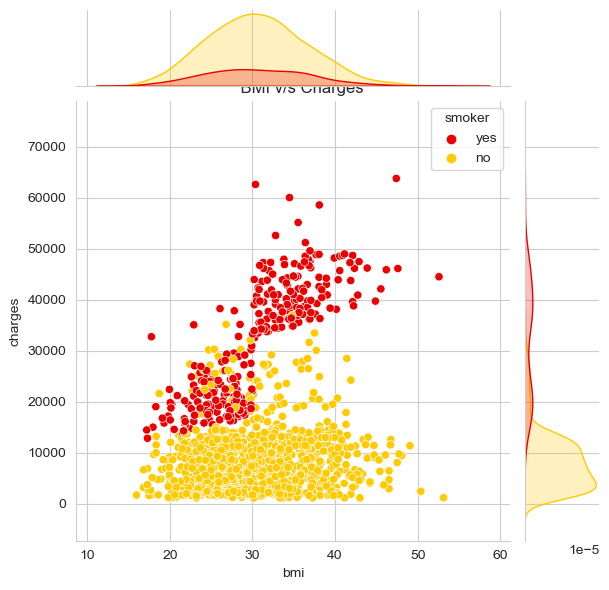

In [27]:
sns.jointplot(x="bmi",y="charges",data=data,hue="smoker",palette='hot')
plt.title("    BMI v/s Charges")

In [28]:
data.corr()

C:\Users\Amdin\AppData\Local\Temp\ipykernel_3416\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


C:\Users\Amdin\AppData\Local\Temp\ipykernel_3416\988841529.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='hot')


<Axes: >

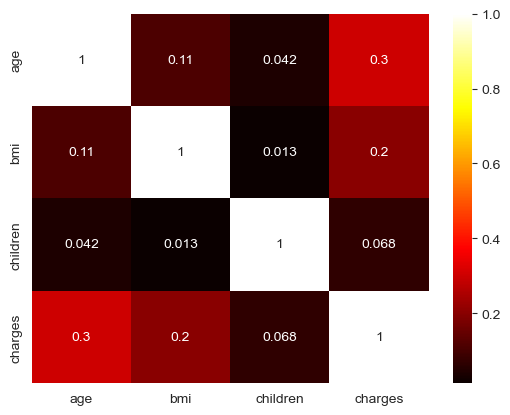

In [29]:
sns.heatmap(data.corr(),annot=True,cmap='hot')

In [30]:
lb=LabelEncoder()
data["sex"]=lb.fit_transform(data["sex"])
data["smoker"]=lb.fit_transform(data["smoker"])
data["region"]=lb.fit_transform(data["region"])

# Linear Regression

In [31]:
# model building--
X=data.iloc[:,0:6]
y=data.iloc[:,6]

In [32]:
# sampling of data--
def train_test(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
    print(X_train.shape),print(y_train.shape)
    print(X_test.shape),print(y_test.shape)
    return X_train,X_test,y_train,y_test

In [33]:
# calling the train_test function--
X_train,X_test,y_train,y_test=train_test(X,y)

(1070, 6)
(1070,)
(268, 6)
(268,)


In [34]:
# defining--
def modelling1(X_train,y_train,X_test):
    model1=LinearRegression()
    model1.fit(X_train,y_train)
    print("Model 1 training is completed")
    pred1=model1.predict(X_test)
    return pred1

In [35]:
pred1=modelling1(X_train,y_train,X_test)
pred1

Model 1 training is completed


array([ 5.97701245e+03,  3.57113825e+03,  3.52859225e+03,  9.01888125e+03,
        1.55666060e+04,  1.39866637e+04,  2.40941942e+04,  3.99388445e+03,
        2.65632011e+04,  5.63117748e+03,  1.07072795e+04,  1.09565429e+04,
        1.47766328e+04,  1.39111339e+04,  3.20141236e+04,  6.83755043e+03,
        7.08541766e+03,  1.35055905e+04,  9.75122283e+03,  5.74158577e+03,
        6.12124078e+03,  1.14572959e+03,  1.14330556e+04,  1.22227332e+04,
        3.02749201e+04,  1.13633123e+04,  3.08946416e+03,  3.93583941e+04,
        4.36507576e+03,  1.39997536e+04, -1.62224961e+02,  1.32930662e+04,
        6.12526000e+03,  1.66528948e+04,  7.49537477e+03,  1.09618975e+04,
        7.32505341e+03,  8.03331487e+03,  1.60316119e+04,  4.21705714e+03,
        1.00995556e+04,  2.07703909e+03,  7.72625467e+03,  1.28596677e+04,
        9.15898464e+03,  1.47723380e+04,  5.23856558e+03,  2.38152227e+04,
        3.36160394e+04,  3.00586475e+04, -9.71852765e+00,  1.64947867e+04,
        8.93626820e+03,  

In [36]:
r2score=(round(r2_score(y_test,pred1)*100,2))
print('r2score:',r2score)

r2score: 75.65


In [37]:
rmse = m.sqrt(mean_squared_error(y_test,pred1))
print('RMSE:',rmse)

RMSE: 5922.240251999296


In [38]:
mae=(mean_absolute_error(y_test,pred1))
print('MAE:' ,mae)

MAE: 4161.0929175837355


# Lasso Regression

In [39]:
# defining--
def modelling2(X_train,y_train,X_test):
    model2=Lasso()
    model2.fit(X_train,y_train)
    print("Model 2 training is completed")
    pred2=model2.predict(X_test)
    return pred2

In [40]:
# calling the model 2 function--
pred2=modelling2(X_train,y_train,X_test)
pred2

Model 2 training is completed


array([ 5.98152940e+03,  3.57384435e+03,  3.53443852e+03,  9.02176033e+03,
        1.55689290e+04,  1.39886802e+04,  2.40894110e+04,  3.99776333e+03,
        2.65614581e+04,  5.63012858e+03,  1.07105102e+04,  1.09598103e+04,
        1.47760168e+04,  1.39120058e+04,  3.20104471e+04,  6.84040957e+03,
        7.08587521e+03,  1.35046878e+04,  9.75109377e+03,  5.74136690e+03,
        6.12109500e+03,  1.15003731e+03,  1.14360161e+04,  1.22194849e+04,
        3.02713497e+04,  1.13653717e+04,  3.09426576e+03,  3.93519112e+04,
        4.36949962e+03,  1.40017024e+04, -1.56915595e+02,  1.32911654e+04,
        6.12831816e+03,  1.66519973e+04,  7.49273039e+03,  1.09645248e+04,
        7.32592052e+03,  8.03292669e+03,  1.60311094e+04,  4.21560421e+03,
        1.00969757e+04,  2.07851565e+03,  7.72458559e+03,  1.28641197e+04,
        9.15871827e+03,  1.47745856e+04,  5.24073515e+03,  2.38104514e+04,
        3.36075872e+04,  3.00574369e+04, -1.08374178e+01,  1.64952387e+04,
        8.93803621e+03,  

In [41]:
r2score=(round(r2_score(y_test,pred2)*100,2))
print('r2score:',r2score)

r2score: 75.65


In [42]:
rmse = m.sqrt(mean_squared_error(y_test,pred2))
print('RMSE:',rmse)

RMSE: 5921.766096553198


In [43]:
mae=(mean_absolute_error(y_test,pred2))
print('MAE:', mae)

MAE: 4161.10688205693


# Ridge Regression

In [44]:
# defining--
def modelling3(X_train,y_train,X_test):
    model3=Ridge()
    model3.fit(X_train,y_train)
    print("Model 3 training is completed")
    pred3 = model3.predict(X_test)
    return pred3

In [45]:
# calling the model 3 function--
pred3=modelling3(X_train,y_train,X_test)
pred3

Model 3 training is completed


array([ 6.00792838e+03,  3.60570249e+03,  3.56275501e+03,  9.05408504e+03,
        1.55989105e+04,  1.40188011e+04,  2.39784960e+04,  4.02982615e+03,
        2.64584797e+04,  5.65574667e+03,  1.07377235e+04,  1.09866044e+04,
        1.47978039e+04,  1.39319725e+04,  3.19045411e+04,  6.86977769e+03,
        7.10953014e+03,  1.35284921e+04,  9.77607428e+03,  5.76512056e+03,
        6.14868788e+03,  1.18117274e+03,  1.14645497e+04,  1.22431807e+04,
        3.01667167e+04,  1.13970103e+04,  3.12532875e+03,  3.92381320e+04,
        4.40222876e+03,  1.40314805e+04, -1.27033780e+02,  1.33150234e+04,
        6.15984877e+03,  1.66743885e+04,  7.52178698e+03,  1.09972076e+04,
        7.35997586e+03,  8.05703287e+03,  1.60542805e+04,  4.24111496e+03,
        1.01214338e+04,  2.10255809e+03,  7.74913577e+03,  1.28915997e+04,
        9.18122872e+03,  1.48026090e+04,  5.27125642e+03,  2.36996489e+04,
        3.34972488e+04,  2.99530583e+04,  1.45436312e+01,  1.65162544e+04,
        8.96950629e+03,  

In [46]:
r2score=(round(r2_score(y_test,pred3)*100,2))
print('r2score:',r2score)

r2score: 75.71


In [47]:
rmse = m.sqrt(mean_squared_error(y_test,pred3))
print('RMSE:',rmse)

RMSE: 5914.889391102591


In [48]:
mae=(mean_absolute_error(y_test,pred3))
print('MAE:' ,mae)

MAE: 4166.307483500118


# KNN Regression

In [49]:
# defining--
def modelling4(X_train,y_train,X_test):
    model4=KNeighborsRegressor(n_neighbors=37)
    model4.fit(X_train,y_train)
    print("Model 4 training is completed")
    pred4=model4.predict(X_test)
    return pred4

In [50]:
# Calling the model 4 function--
pred4=modelling4(X_train,y_train,X_test)
pred4

Model 4 training is completed


array([11496.05755649,  8280.37985892,  7706.91786189, 17336.42497   ,
       17610.60214216, 18751.09923054,  4988.47394703, 10290.66259189,
        9880.58564108,  6870.81547946, 14141.69012568, 15162.62314865,
       18022.19283568, 20461.97876541, 11300.81368649,  8417.86614703,
        9680.06961811, 18405.20961541, 17268.54926108,  8844.53888486,
       13976.70568514,  6288.93074189, 13932.98023892, 15472.01678649,
       10216.77168946, 17992.91168378,  7994.33333189, 24385.52136649,
        9862.55438649, 17914.46565027,  4682.47785   , 16678.16017351,
        8689.04279216, 22125.58124297, 13341.93430324, 15099.58391081,
       11525.71372162,  8183.89802703, 17839.30875162,  7989.65919622,
       14132.84954514,  6746.33525703,  8229.47101892, 17505.7554973 ,
       14674.73923703, 19520.67201135,  9013.1307573 ,  4796.7406973 ,
       14551.92237189, 14490.33532351,  5745.30410595, 22278.27887541,
        8832.10849595, 16047.83717162, 16511.46947135, 16677.66380054,
      

In [51]:
r2score=(round(r2_score(y_test,pred4)*100,2))
print('r2score:',r2score)

r2score: 15.17


In [52]:
rmse = m.sqrt(mean_squared_error(y_test,pred4))
print('RMSE:',rmse)

RMSE: 11052.885510528004


In [53]:
mae=(mean_absolute_error(y_test,pred4))
print('MAE:', mae)

MAE: 8668.243598248891


In [54]:
# choosing k---sqrt(n)--
m.sqrt(len(data))

36.578682316343766

In [55]:
# error method--
error_rate=[]
for i in range(1,100):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn_train=knn.fit(X_train,y_train)
    pred_i=knn_train.predict(X_test)
    error_rate.append(1-r2_score(y_test,pred_i))

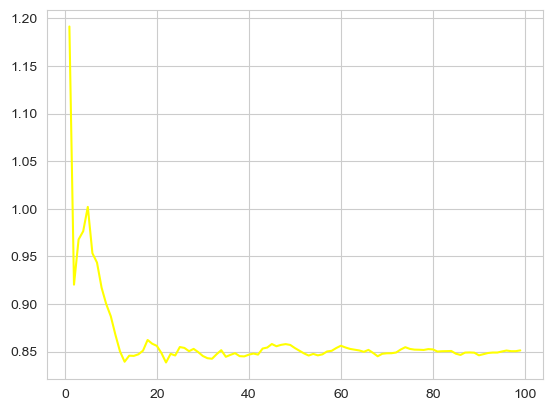

In [56]:
plt.plot(range(1,100),error_rate,color="yellow")

In [57]:
error_rate

[1.191547619905443,
 0.9202469367091209,
 0.967783801238872,
 0.9763822798597085,
 1.0019579895360864,
 0.9533009745825182,
 0.9434374003706675,
 0.9170406899975707,
 0.8998977878910587,
 0.8870346031605741,
 0.8676393555950219,
 0.8500763466030011,
 0.839256629129598,
 0.8456369132458411,
 0.8454029040324983,
 0.8470732434804642,
 0.8509035891970064,
 0.8621473621519531,
 0.8581768092532749,
 0.8559412041784601,
 0.8484300590862206,
 0.8384783661227755,
 0.8475578506244867,
 0.8458343936514743,
 0.854706718497046,
 0.8537822607893251,
 0.8503281777248306,
 0.8527656104569853,
 0.8493621843482461,
 0.8452936488308633,
 0.8429835977147356,
 0.8424015973875698,
 0.8471748158693486,
 0.851425586536003,
 0.8444559491162171,
 0.8464730634619335,
 0.8482652873386893,
 0.8451264337805267,
 0.844873652605862,
 0.8466683835255394,
 0.8478718567953929,
 0.846757177292037,
 0.8531469670313931,
 0.8541699129273651,
 0.8578690938655604,
 0.8555393034055154,
 0.8569903692194708,
 0.8577742595061562,

In [58]:
### The regression models represent the accuracy and error in prediction of datasets.
### From the dataset of Insurance, the insuarance cost was predicted with different prediction models such as:
### 1. Linear Regression model.
### 2. Lasso Regression model.
### 3. Ridge Regression model.
### 4. KNN Regression model.

In [59]:
### From the prediction model of Linear Regression, the model got the accuracy of 75.65, Mean Squared Error of 5922.240251999296 and Mean Absolute Error of 4161.0929175837355.
### From the prediction model of Lasso Regression, the model got the accuracy of 75.65, Mean Squared Error of 5921.766096553198 and Mean Absolute Error of 4161.10688205693.
### From the Prediction model of Ridge Regression, the model got the accuracy of 75.71, Mean Squared Error of 5914.889391102591 and Mean Absolute Error of 4166.307483500118.
### From the prediction model of KNN Regression, the model got the accuracy of 15.17, Mean Squared Error of 11052.885510528004 and Mean Absolute Error of 8668.243598248891.

In [60]:
### From all the prediction models, the Ridge Regression has the highest accuracy rate of 75.71 and the lowest Mean Squared Error of 5914.889391102591.
### Which means the Ridge Regression is the most efficient and convenient model for such type of dataset where the data contains cost prediction and the string of "YES" or "NO".
### Linear Regression model and Lasso Regression model got the accuracy and Mean Squared Error is somewhat same to Ridge Regression, not much of difference in the result.
### KNN Regression model got the lowest accuracy and Highest Means Squared Error rate as 15.17 and 11052.885510528004 respectively, which is not convincing to take in for prediction.